# Telecom users dataset

- The data of this project is located in https://www.kaggle.com/radmirzosimov/telecom-users-dataset 
- It´s provided a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment. 
- The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract

In [66]:
# MAIN LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PREPROCESSING, VALIDATION AND ML MODELS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif , mutual_info_classif
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier



#CLUSTERING ALGORITHMS
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes


#INTERNAL VALIDATIONS
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


pd.options.display.max_columns=None

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [56]:
users = pd.read_csv('telecom_users.csv')
users.head(2)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No


### COLUMNS EXPLANATION

- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has is the telephone service connectedbeen a client of the company
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client's Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No)

In [57]:
users.drop(['Unnamed: 0','customerID'], 1, inplace = True)

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [58]:
# Converting total charges columns into a numerical column
users.TotalCharges.replace(' ', 0, inplace=True)
users.TotalCharges = pd.to_numeric(users.TotalCharges)

In [47]:
users.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
# Looking for null values
users.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- This is the defined function I made to plot each categorical variable and its conection with the label (Chunk)

In [83]:
def stacked_bar_plot(column, hue, ax, axnumber):
    df_plot = users.groupby([hue, column]).size().reset_index().pivot(columns=hue, index=column, values=0)
    df_plot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)


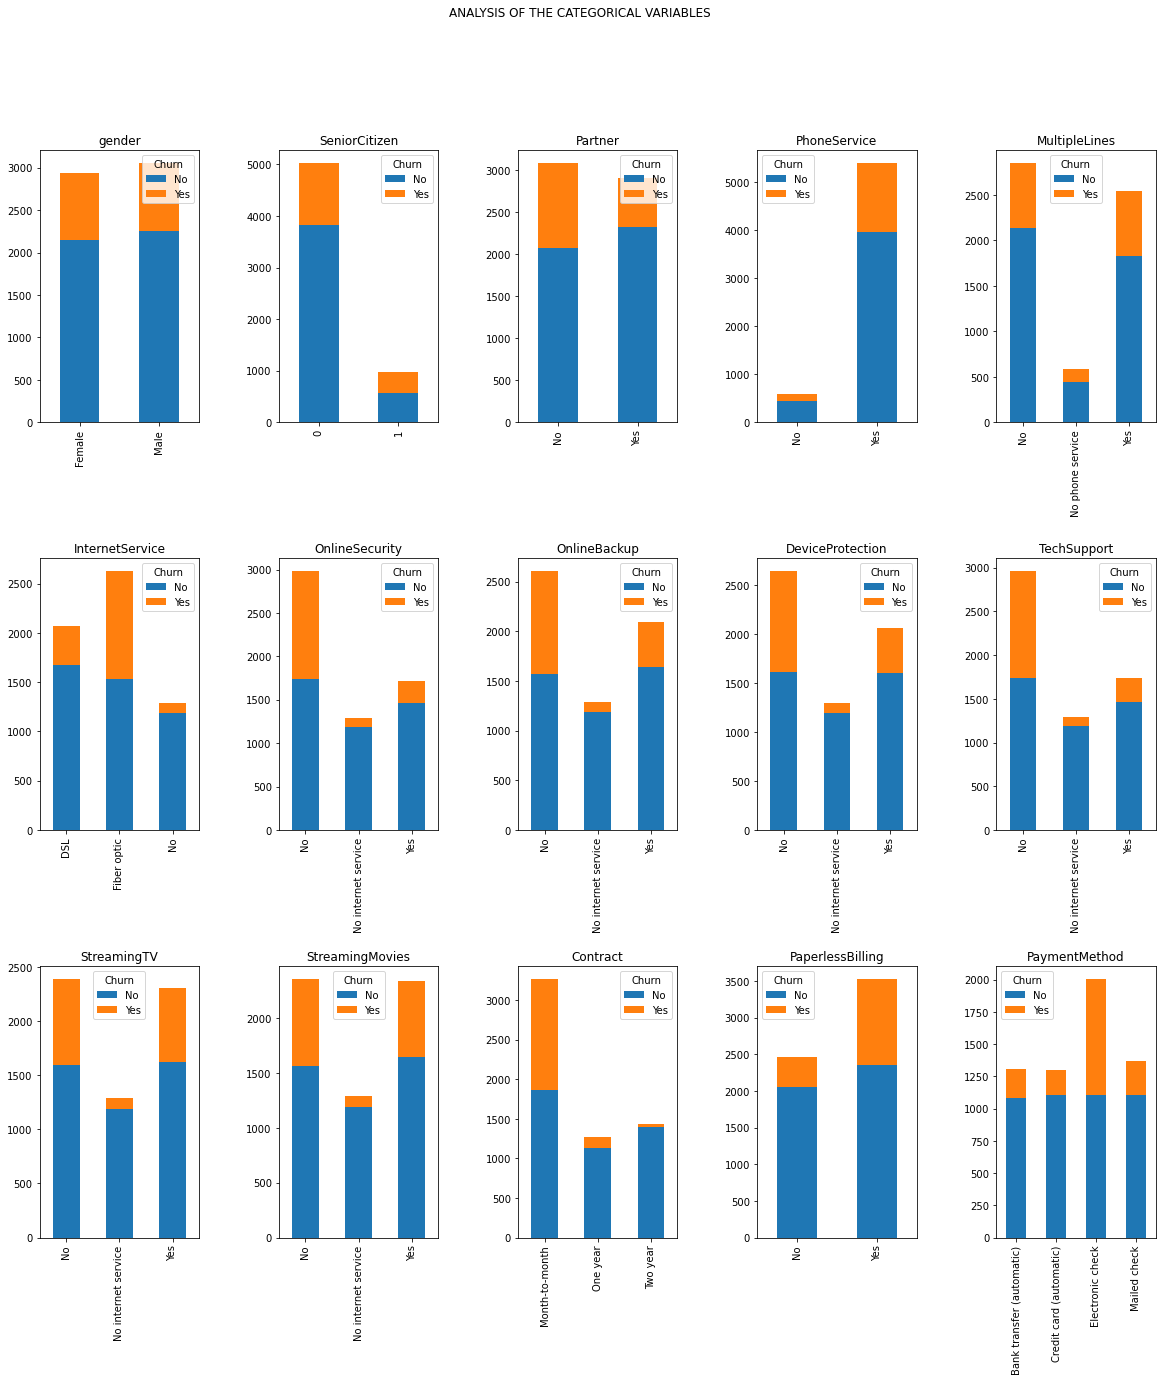

In [7]:
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5, figsize = (20,20))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
fig.suptitle('ANALYSIS OF THE CATEGORICAL VARIABLES')

stacked_bar_plot('gender', 'Churn', ax1, 1)
stacked_bar_plot('SeniorCitizen', 'Churn', ax2, 2)
stacked_bar_plot('Partner', 'Churn', ax3, 3)
stacked_bar_plot('PhoneService', 'Churn', ax4, 4)
stacked_bar_plot('MultipleLines', 'Churn', ax5, 5)
stacked_bar_plot('InternetService', 'Churn', ax6, 6)
stacked_bar_plot('OnlineSecurity', 'Churn', ax7, 7)
stacked_bar_plot('OnlineBackup', 'Churn', ax8, 8)
stacked_bar_plot('DeviceProtection', 'Churn', ax9, 9)
stacked_bar_plot('TechSupport', 'Churn', ax10, 10)
stacked_bar_plot('StreamingTV', 'Churn', ax11, 11)
stacked_bar_plot('StreamingMovies', 'Churn', ax12, 12)
stacked_bar_plot('Contract', 'Churn', ax13, 13)
stacked_bar_plot('PaperlessBilling', 'Churn', ax14, 14)
stacked_bar_plot('PaymentMethod', 'Churn', ax15, 15)



- **Analysis of the continuous variables**

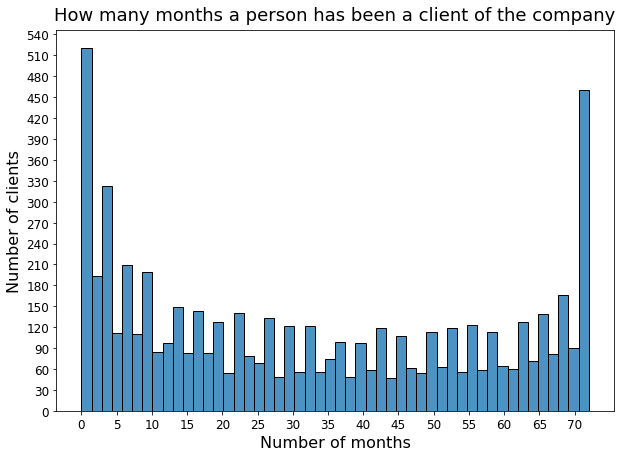

In [71]:
tenure = users['tenure']

plt.figure(figsize=(10, 7))
sns.histplot(tenure, bins=50, alpha=0.8)

plt.title('How many months a person has been a client of the company', fontsize=18, pad=10)
plt.xticks(list(range(0, tenure.max(), 5)), fontsize=12)
plt.yticks(list(range(0, 550, 30)), fontsize=12)
plt.xlabel('Number of months', fontsize=16)
plt.ylabel('Number of clients', fontsize=16)
plt.show()

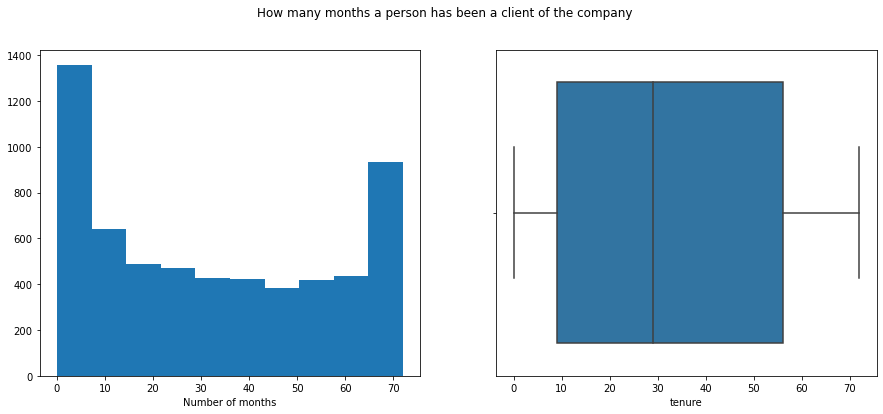

In [81]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))

ax1.hist(users.tenure)
ax1.set_xlabel('Number of months')

sns.boxplot(users.tenure)

fig.suptitle('How many months a person has been a client of the company')

plt.show();

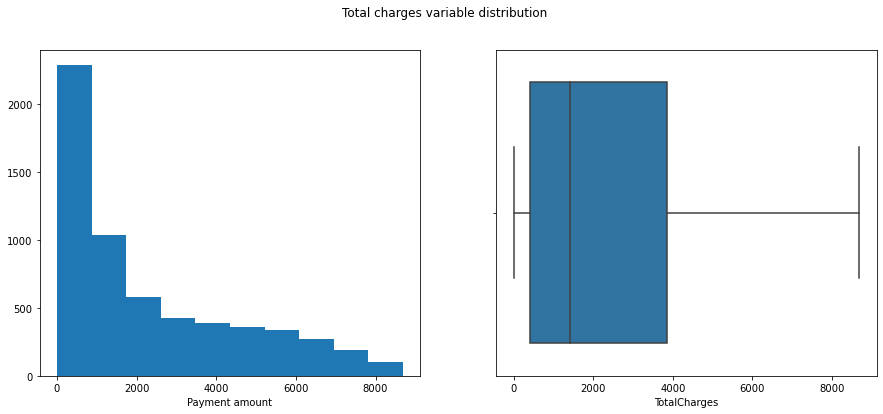

In [80]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))

ax1.hist(users.TotalCharges)
ax1.set_xlabel('Payment amount')

sns.boxplot(users.TotalCharges)

fig.suptitle('Total charges variable distribution')

plt.show();


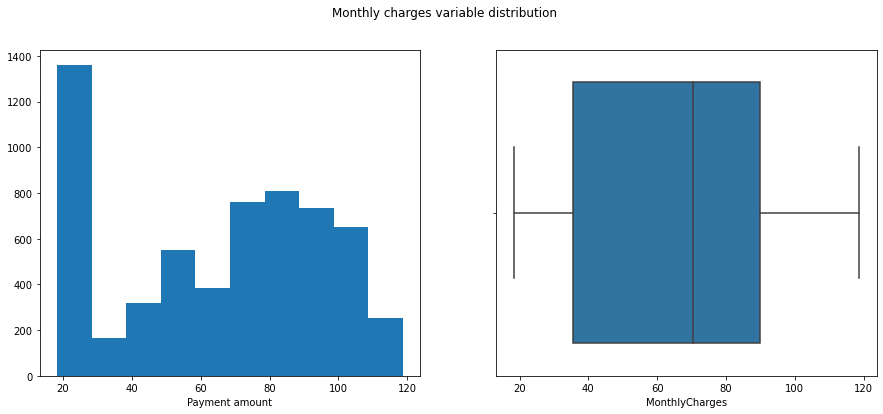

In [79]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,6))

ax1.hist(users.MonthlyCharges)
sns.boxplot(users.MonthlyCharges)

ax1.set_xlabel('Payment amount')

fig.suptitle('Monthly charges variable distribution')

plt.show();

- **Label distribution**

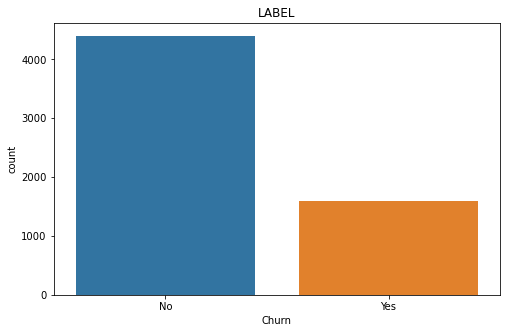

In [56]:
fig,ax = plt.subplots(figsize = (8,5))
sns.countplot(users.Churn)
plt.title('LABEL')
plt.show();

## ONE HOT ENCODING OF THE CATEGORICAL VARIABLES

- With the goal of include the categorical variables in the machine learning model, I´ll encode them with ONE HOT ENCODING, the recommended encoding when the categorical features are not ordinal

In [48]:
users.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [59]:
users_onehot = pd.get_dummies(users, columns=[ 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [7]:
users_onehot.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,72,24.10,1734.65,No,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
1,0,44,88.15,3973.20,No,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0


- **Analyzing the correlation between variables**

<AxesSubplot:>

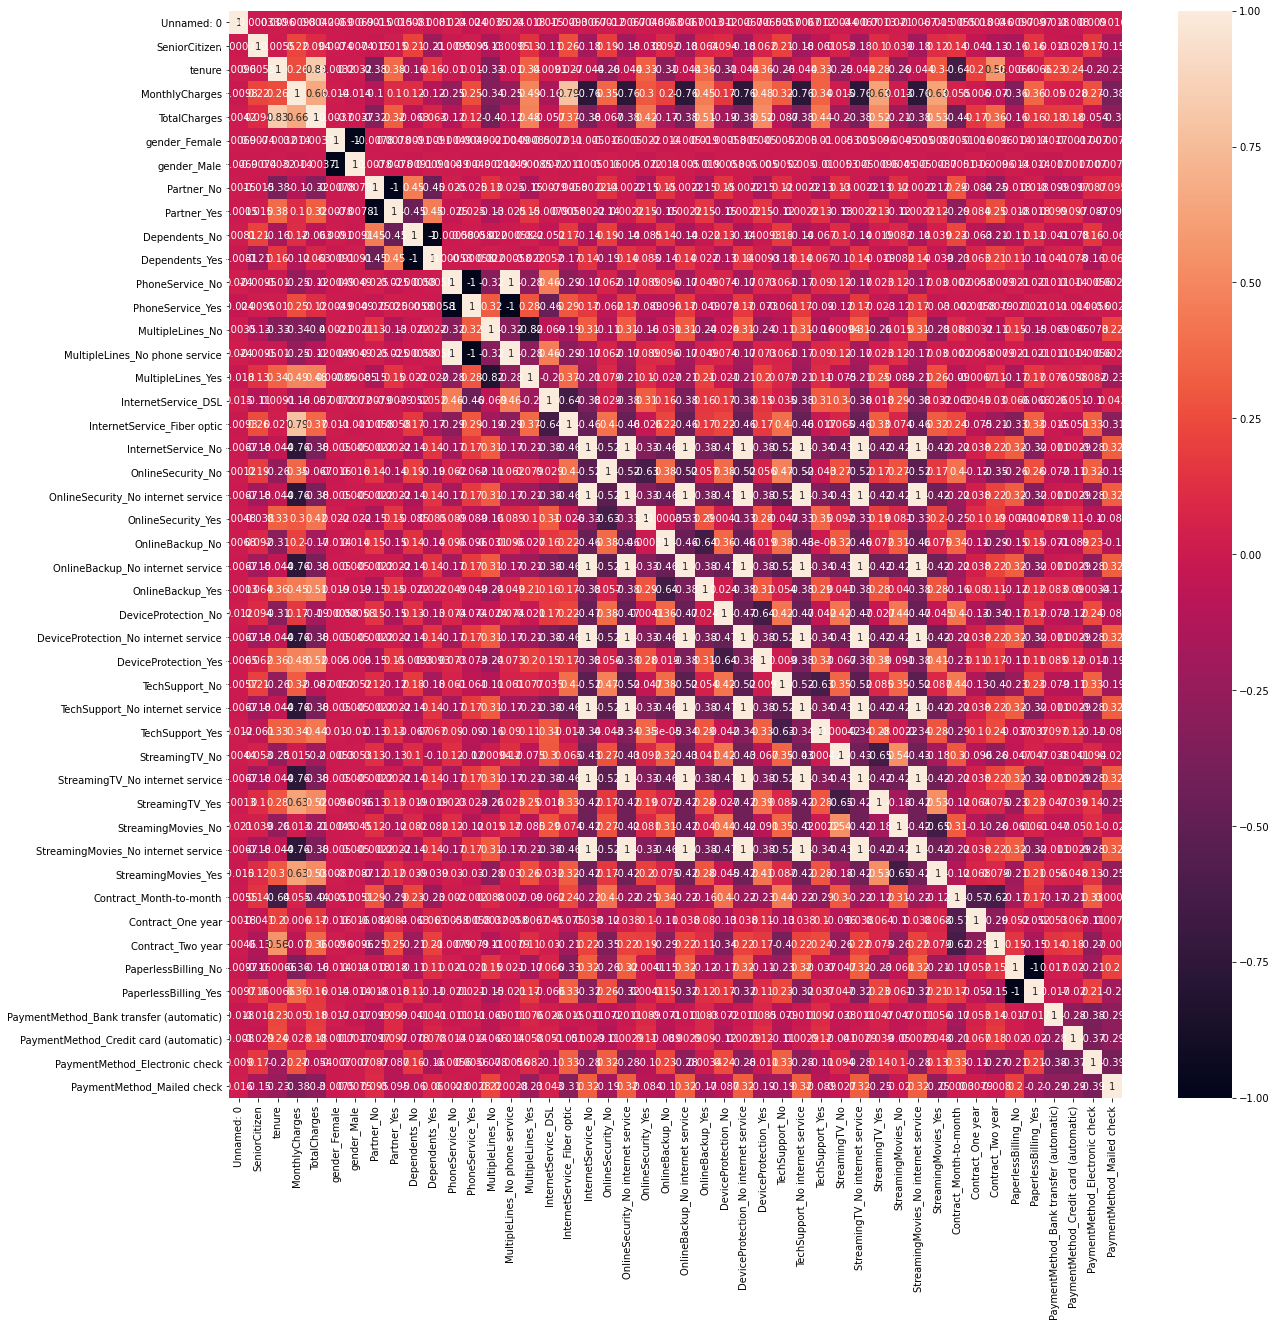

In [11]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(users_onehot.corr(), annot=True)

- **Correlation between the features and the label**

In [60]:
users_onehot['Churn'] = LabelEncoder().fit_transform(users_onehot['Churn'])

corr = users_onehot.corr()

Churn = pd.DataFrame(corr['Churn'].sort_values(ascending=False))
Churn

,Churn
Churn,1.000000
Contract_Month-to-month,0.403907
OnlineSecurity_No,0.341700
TechSupport_No,0.330994
InternetService_Fiber optic,0.300898
PaymentMethod_Electronic check,0.296803
OnlineBackup_No,0.265175
DeviceProtection_No,0.252376
PaperlessBilling_Yes,0.188996
MonthlyCharges,0.186753


## TRAINING MACHINE LEARNING MODELS TO PREDICT THE LABEL

In [61]:
features = users_onehot.drop('Churn', 1)
label = users_onehot.Churn

In [62]:
# Standarizing the data and splitting it into train and test sets

X_train,X_test,y_train,y_test = train_test_split(features, label, test_size = 0.2 )
standar = StandardScaler()
X_train_norm = standar.fit_transform(X_train)
X_test_norm = standar.fit_transform(X_test)

In [63]:
#Balancing the classes by combining over- and under-sampling.
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train_norm, y_train)
y_train_res.value_counts()


0    3314
1    3314
Name: Churn, dtype: int64

- **I want to focus in the people who is leaving the company in order to analyze possible patterns, so I´m going to specially focus on the recall of the class 1**

In [16]:
results = pd.DataFrame(columns = ['Model', 'Balanced/Not balanced','Train score', 'Test score','Recall class1'])

### **Logistic Regression**

In [37]:
#Hyperparameter tunning to find the best hyperparameters combination
parameters={'penalty':['l1','l2'],'C':[0.1,0.3,0.5,0.7,0.9,1.5,10]}
lr=LogisticRegression(solver='liblinear')
grid=GridSearchCV(lr,param_grid=parameters).fit(X_train_norm,y_train)
grid.best_params_

{'C': 0.3, 'penalty': 'l2'}

In [65]:
lr=LogisticRegression(penalty='l2',C=0.3,solver='liblinear').fit(X_train_norm,y_train)
y_pred=lr.predict(X_test_norm)
print('TRAIN SCORES:',lr.score(X_train_norm,y_train), 'TEST SCORE:', lr.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))


results.loc[1] = ['Logistic Regression', 'Unbalanced', lr.score(X_train_norm,y_train), lr.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.7997076023391813 TEST SCORE: 0.8105175292153589
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       896
           1       0.63      0.59      0.61       302

    accuracy                           0.81      1198
   macro avg       0.75      0.74      0.74      1198
weighted avg       0.81      0.81      0.81      1198

col_0    0    1
Churn          
0      794  102
1      125  177


- With the hyperparameter class_weight = 'balanced' to compensate the  unbalance in the classes of the label:


In [28]:
lr=LogisticRegression(penalty='l2',C=0.3,solver='liblinear', class_weight='balanced').fit(X_train_norm,y_train)
y_pred=lr.predict(X_test_norm)
print('TRAIN SCORES:',lr.score(X_train_norm,y_train), 'TEST SCORE:', lr.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[2] = ['Logistic Regression', 'Balanced', lr.score(X_train_norm,y_train), lr.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.741436925647452 TEST SCORE: 0.7629382303839732
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       877
           1       0.54      0.83      0.65       321

    accuracy                           0.76      1198
   macro avg       0.73      0.79      0.74      1198
weighted avg       0.82      0.76      0.78      1198

col_0    0    1
Churn          
0      646  231
1       53  268


### **Random Forest Classifier**

In [31]:
parameters={'max_depth':[2,3,5,7,9,11,13,15],
            'n_estimators': [50,10,150,200,300],
           'class_weight':['balanced',None]}
rf=RandomForestClassifier()
grid=GridSearchCV(rf,param_grid=parameters).fit(X_train_norm,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'class_weight': None, 'max_depth': 9, 'n_estimators': 150}
0.802218135570666


In [33]:
rf=RandomForestClassifier(n_estimators=150, max_depth=9).fit(X_train_norm,y_train)
y_pred=rf.predict(X_test_norm)
print('TRAIN SCORES:',rf.score(X_train_norm,y_train), 'TEST SCORE:', rf.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[3] = ['Random Forest Classifier', 'Unbalanced', rf.score(X_train_norm,y_train), rf.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8510860484544696 TEST SCORE: 0.7963272120200334
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       877
           1       0.68      0.46      0.55       321

    accuracy                           0.80      1198
   macro avg       0.75      0.69      0.71      1198
weighted avg       0.78      0.80      0.78      1198

col_0    0    1
Churn          
0      806   71
1      173  148


**With class_weight='balanced'**

In [36]:
rf=RandomForestClassifier(n_estimators=150, max_depth=9,class_weight='balanced').fit(X_train_norm,y_train)
y_pred=rf.predict(X_test_norm)
print('TRAIN SCORES:',rf.score(X_train_norm,y_train), 'TEST SCORE:', rf.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[4] = ['Random Forest Classifier', 'Balanced', rf.score(X_train_norm,y_train), rf.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8427318295739349 TEST SCORE: 0.7838063439065108
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       877
           1       0.58      0.74      0.65       321

    accuracy                           0.78      1198
   macro avg       0.73      0.77      0.75      1198
weighted avg       0.81      0.78      0.79      1198

col_0    0    1
Churn          
0      702  175
1       84  237


**Applying the Smote-Tomek technique to balance the classes of the label**

In [41]:


rf=RandomForestClassifier(n_estimators=150, max_depth=7).fit(X_train_res,y_train_res)
y_pred=rf.predict(X_test_norm)
print('TRAIN SCORES:',rf.score(X_train_res,y_train_res), 'TEST SCORE:', rf.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[5] = ['Random Forest Classifier', 'Smote-Tomek technique', rf.score(X_train_res,y_train_res), rf.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8618361836183618 TEST SCORE: 0.7429048414023373
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       877
           1       0.51      0.85      0.64       321

    accuracy                           0.74      1198
   macro avg       0.72      0.78      0.72      1198
weighted avg       0.82      0.74      0.76      1198

col_0    0    1
Churn          
0      617  260
1       48  273


### **Decission tree Classifier**

In [43]:
parameters={'max_depth':[2,3,5,7,9,11,13,15]}
tree=DecisionTreeClassifier()
grid=GridSearchCV(tree,param_grid=parameters).fit(X_train_norm,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5}
0.7859239577402416


In [44]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train_norm, y_train)
y_pred = tree.predict(X_test_norm)
print('TRAIN SCORES:',tree.score(X_train_norm,y_train), 'TEST SCORE:', tree.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[6] = ['Decission tree Classifier', 'Unbalanced', tree.score(X_train_norm,y_train), tree.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8022138680033417 TEST SCORE: 0.7871452420701168
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       877
           1       0.61      0.56      0.58       321

    accuracy                           0.79      1198
   macro avg       0.73      0.71      0.72      1198
weighted avg       0.78      0.79      0.78      1198

col_0    0    1
Churn          
0      764  113
1      142  179


**With class_weight='balanced'**

In [45]:
tree = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
tree.fit(X_train_norm, y_train)
y_pred = tree.predict(X_test_norm)
print('TRAIN SCORES:',tree.score(X_train_norm,y_train), 'TEST SCORE:', tree.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[7] = ['Decission tree Classifier', 'Balanced', tree.score(X_train_norm,y_train), tree.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.7548036758563075 TEST SCORE: 0.7378964941569283
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       877
           1       0.51      0.75      0.60       321

    accuracy                           0.74      1198
   macro avg       0.70      0.74      0.70      1198
weighted avg       0.79      0.74      0.75      1198

col_0    0    1
Churn          
0      644  233
1       81  240


**Applying the Smote-Tomek technique**

In [46]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train_res, y_train_res)
y_pred = tree.predict(X_test_norm)
print('TRAIN SCORES:',tree.score(X_train_res,y_train_res), 'TEST SCORE:', tree.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[8] = ['Decission tree Classifier', 'Smote-Tomek technique', tree.score(X_train_res,y_train_res), tree.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8117311731173117 TEST SCORE: 0.6360601001669449
              precision    recall  f1-score   support

           0       0.94      0.54      0.68       877
           1       0.42      0.91      0.57       321

    accuracy                           0.64      1198
   macro avg       0.68      0.72      0.63      1198
weighted avg       0.80      0.64      0.65      1198

col_0    0    1
Churn          
0      471  406
1       30  291


### **KNeighbors Classifier**

In [50]:
parameters={'n_neighbors':[1,3,5,7,8,9,11,13]}
kn=KNeighborsClassifier(weights='distance')
grid=GridSearchCV(kn,param_grid=parameters).fit(X_train_norm,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 13}
0.7596065034478396


In [55]:
kn=KNeighborsClassifier(n_neighbors=13, weights='distance').fit(X_train_norm,y_train)
y_pred=kn.predict(X_test_norm)
print('TRAIN SCORES:',kn.score(X_train_norm,y_train), 'TEST SCORE:', kn.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[9] = ['KNeighbors Classifier', 'Unbalanced', kn.score(X_train_norm,y_train), kn.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.9989557226399332 TEST SCORE: 0.7662771285475793
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       877
           1       0.58      0.49      0.53       321

    accuracy                           0.77      1198
   macro avg       0.70      0.68      0.69      1198
weighted avg       0.76      0.77      0.76      1198

col_0    0    1
Churn          
0      762  115
1      165  156


**Applying the Smote-Tomek technique**

In [56]:
kn=KNeighborsClassifier(n_neighbors=8, weights='distance').fit(X_train_res,y_train_res)
y_pred=kn.predict(X_test_norm)
print('TRAIN SCORES:',kn.score(X_train_res,y_train_res), 'TEST SCORE:', kn.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[10] = ['KNeighbors Classifier', 'Smote-Tomek technique', kn.score(X_train_res,y_train_res), kn.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.9998499849984999 TEST SCORE: 0.7011686143572621
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       877
           1       0.46      0.73      0.57       321

    accuracy                           0.70      1198
   macro avg       0.67      0.71      0.67      1198
weighted avg       0.77      0.70      0.72      1198

col_0    0    1
Churn          
0      605  272
1       86  235


### **SVC**

In [57]:

parameters={'max_iter': [1000,5000,10000],'C':[0.1,0.3,0.5,0.7,0.8,1]}
svc=LinearSVC(dual=False,class_weight='balanced')
grid=GridSearchCV(svc,param_grid=parameters).fit(X_train_norm,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'max_iter': 1000}
0.7314144977236188


In [59]:
svc=LinearSVC(max_iter=1000,C=0.1, class_weight='balanced').fit(X_train_norm,y_train)
y_pred=svc.predict(X_test_norm)
print('TRAIN SCORES:',svc.score(X_train_norm,y_train), 'TEST SCORE:', svc.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[11] = ['SVC', 'Balanced', svc.score(X_train_norm,y_train), svc.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.7368421052631579 TEST SCORE: 0.7595993322203672
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       877
           1       0.53      0.83      0.65       321

    accuracy                           0.76      1198
   macro avg       0.73      0.78      0.73      1198
weighted avg       0.82      0.76      0.77      1198

col_0    0    1
Churn          
0      642  235
1       53  268


### **Naive Bayes**

In [60]:

gnb=GaussianNB().fit(X_train_norm,y_train)
y_pred=gnb.predict(X_test_norm)
print('TRAIN SCORES:',gnb.score(X_train_norm,y_train), 'TEST SCORE:', gnb.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[12] = ['Naive Bayes', 'Unbalanced', gnb.score(X_train_norm,y_train), gnb.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.6973684210526315 TEST SCORE: 0.7036727879799666
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       877
           1       0.47      0.86      0.61       321

    accuracy                           0.70      1198
   macro avg       0.70      0.75      0.68      1198
weighted avg       0.80      0.70      0.72      1198

col_0    0    1
Churn          
0      568  309
1       46  275


**Applying the Smote-Tomek technique**

In [61]:
gnb=GaussianNB().fit(X_train_res,y_train_res)
y_pred=gnb.predict(X_test_norm)
print('TRAIN SCORES:',gnb.score(X_train_res,y_train_res), 'TEST SCORE:', gnb.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[13] = ['Naive Bayes', 'Smote-Tomek technique', gnb.score(X_train_res,y_train_res), gnb.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.7629762976297629 TEST SCORE: 0.6994991652754591
              precision    recall  f1-score   support

           0       0.92      0.64      0.76       877
           1       0.47      0.86      0.60       321

    accuracy                           0.70      1198
   macro avg       0.70      0.75      0.68      1198
weighted avg       0.80      0.70      0.72      1198

col_0    0    1
Churn          
0      563  314
1       46  275


### **Extra trees classifier**

In [65]:

extra=ExtraTreesClassifier(n_estimators=200, max_depth=7,n_jobs=-1).fit(X_train_norm,y_train)
y_pred=extra.predict(X_test_norm)
print('TRAIN SCORES:',extra.score(X_train_norm,y_train), 'TEST SCORE:', extra.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[14] = ['Extra trees classifier', 'Unbalanced', extra.score(X_train_norm,y_train), extra.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8084795321637427 TEST SCORE: 0.7829716193656093
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       877
           1       0.67      0.37      0.48       321

    accuracy                           0.78      1198
   macro avg       0.74      0.65      0.67      1198
weighted avg       0.77      0.78      0.76      1198

col_0    0    1
Churn          
0      820   57
1      203  118


### **Adaboost Classifier**

In [66]:
ada=AdaBoostClassifier(n_estimators=1000,learning_rate=1).fit(X_train_norm,y_train)
y_pred=ada.predict(X_test_norm)
print('TRAIN SCORES:',ada.score(X_train_norm,y_train), 'TEST SCORE:', ada.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[15] = ['Adaboost Classifier', 'Unbalanced', ada.score(X_train_norm,y_train), ada.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8222639933166249 TEST SCORE: 0.7938230383973289
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       877
           1       0.65      0.50      0.56       321

    accuracy                           0.79      1198
   macro avg       0.74      0.70      0.71      1198
weighted avg       0.78      0.79      0.78      1198

col_0    0    1
Churn          
0      792   85
1      162  159


**Applying the Smote-Tomek technique**

In [67]:
ada=AdaBoostClassifier(n_estimators=1000,learning_rate=0.5).fit(X_train_res,y_train_res)
y_pred=ada.predict(X_test_norm)
print('TRAIN SCORES:',ada.score(X_train_res,y_train_res), 'TEST SCORE:', ada.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[16] = ['Adaboost Classifier', 'Smote-Tomek technique', ada.score(X_train_res,y_train_res), ada.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8706870687068707 TEST SCORE: 0.3013355592654424
              precision    recall  f1-score   support

           0       0.80      0.06      0.11       877
           1       0.27      0.96      0.42       321

    accuracy                           0.30      1198
   macro avg       0.54      0.51      0.27      1198
weighted avg       0.66      0.30      0.20      1198

col_0   0    1
Churn         
0      53  824
1      13  308


### **Gradient Boosting Classifier**

In [68]:
gb=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3).fit(X_train_norm,y_train)
y_pred=gb.predict(X_test_norm)
print('TRAIN SCORES:',gb.score(X_train_norm,y_train), 'TEST SCORE:', gb.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[17] = ['Gradient Boosting Classifier', 'Unbalanced', gb.score(X_train_norm,y_train), gb.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.9970760233918129 TEST SCORE: 0.7362270450751253
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       877
           1       0.51      0.42      0.46       321

    accuracy                           0.74      1198
   macro avg       0.66      0.64      0.64      1198
weighted avg       0.72      0.74      0.73      1198

col_0    0    1
Churn          
0      747  130
1      186  135


**Applying the Smote-Tomek technique**

In [69]:
gb=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3).fit(X_train_res,y_train_res)
y_pred=gb.predict(X_test_norm)
print('TRAIN SCORES:',gb.score(X_train_res,y_train_res), 'TEST SCORE:', gb.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[18] = ['Gradient Boosting Classifier', 'Smote-Tomek technique', gb.score(X_train_res,y_train_res), gb.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.9998499849984999 TEST SCORE: 0.29549248747913187
              precision    recall  f1-score   support

           0       0.69      0.07      0.12       877
           1       0.27      0.92      0.41       321

    accuracy                           0.30      1198
   macro avg       0.48      0.49      0.27      1198
weighted avg       0.58      0.30      0.20      1198

col_0   0    1
Churn         
0      59  818
1      26  295


### **Balanced Bagging Classifier**

In [70]:
bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train_norm, y_train)
pred_y = bbc.predict(X_test_norm)
print('TRAIN SCORES:',bbc.score(X_train_norm,y_train), 'TEST SCORE:', bbc.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[19] = ['Balanced Bagging Classifier', 'Unbalanced', bbc.score(X_train_norm,y_train), bbc.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.8939014202172096 TEST SCORE: 0.7520868113522537
              precision    recall  f1-score   support

           0       0.69      0.07      0.12       877
           1       0.27      0.92      0.41       321

    accuracy                           0.30      1198
   macro avg       0.48      0.49      0.27      1198
weighted avg       0.58      0.30      0.20      1198

col_0   0    1
Churn         
0      59  818
1      26  295


**Applying the Smote-Tomek technique**

In [72]:
bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train_res, y_train_res)
y_pred = bbc.predict(X_test_norm)
print('TRAIN SCORES:',bbc.score(X_train_res,y_train_res), 'TEST SCORE:', bbc.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

results.loc[20] = ['Balanced Bagging Classifier', 'Smote-Tomek technique', bbc.score(X_train_res,y_train_res), bbc.score(X_test_norm,y_test), 
                  recall_score(y_test,y_pred,pos_label=1)]

TRAIN SCORES: 0.9861986198619862 TEST SCORE: 0.3380634390651085
              precision    recall  f1-score   support

           0       0.69      0.07      0.12       877
           1       0.27      0.92      0.41       321

    accuracy                           0.30      1198
   macro avg       0.48      0.49      0.27      1198
weighted avg       0.58      0.30      0.20      1198

col_0   0    1
Churn         
0      59  818
1      26  295


#### SUMMARY OF THE ML TESTS

In [75]:
results.to_csv('ML_results.csv', index=False)
results

,Model,Balanced/Not balanced,Train score,Test score,Recall class1
1,Logistic Regression,Unbalanced,0.802005,0.803840,0.517134
2,Logistic Regression,Balanced,0.741437,0.762938,0.834891
3,Random Forest Classifier,Unbalanced,0.851086,0.796327,0.461059
4,Random Forest Classifier,Balanced,0.842732,0.783806,0.738318
5,Random Forest Classifier,Smote-Tomek technique,0.861836,0.742905,0.850467
6,Decission tree Classifier,Unbalanced,0.802214,0.787145,0.557632
7,Decission tree Classifier,Balanced,0.754804,0.737896,0.747664
8,Decission tree Classifier,Smote-Tomek technique,0.811731,0.636060,0.906542
9,KNeighbors Classifier,Unbalanced,0.998956,0.766277,0.485981
10,KNeighbors Classifier,Smote-Tomek technique,0.999850,0.701169,0.732087


In [15]:
results = pd.read_csv('ML_results.csv')
results.sort_values(by='Recall class1',ascending=False)

,Model,Balanced/Not balanced,Train score,Test score,Recall class1
15,Adaboost Classifier,Smote-Tomek technique,0.870687,0.301336,0.959502
19,Balanced Bagging Classifier,Smote-Tomek technique,0.986199,0.338063,0.919003
18,Balanced Bagging Classifier,Unbalanced,0.893901,0.752087,0.919003
17,Gradient Boosting Classifier,Smote-Tomek technique,0.999850,0.295492,0.919003
7,Decission tree Classifier,Smote-Tomek technique,0.811731,0.636060,0.906542
12,Naive Bayes,Smote-Tomek technique,0.762976,0.699499,0.856698
11,Naive Bayes,Unbalanced,0.697368,0.703673,0.856698
4,Random Forest Classifier,Smote-Tomek technique,0.861836,0.742905,0.850467
1,Logistic Regression,Balanced,0.741437,0.762938,0.834891
10,SVC,Balanced,0.736842,0.759599,0.834891


In [13]:
results[results['Test score']>0.75].sort_values(by='Recall class1',ascending=False)

,Model,Balanced/Not balanced,Train score,Test score,Recall class1
18,Balanced Bagging Classifier,Unbalanced,0.893901,0.752087,0.919003
1,Logistic Regression,Balanced,0.741437,0.762938,0.834891
10,SVC,Balanced,0.736842,0.759599,0.834891
3,Random Forest Classifier,Balanced,0.842732,0.783806,0.738318
5,Decission tree Classifier,Unbalanced,0.802214,0.787145,0.557632
0,Logistic Regression,Unbalanced,0.802005,0.803840,0.517134
14,Adaboost Classifier,Unbalanced,0.822264,0.793823,0.495327
8,KNeighbors Classifier,Unbalanced,0.998956,0.766277,0.485981
2,Random Forest Classifier,Unbalanced,0.851086,0.796327,0.461059
13,Extra trees classifier,Unbalanced,0.808480,0.782972,0.367601


### REDUCING FEATURES TO IMPROVE THE MODEL WITH SELECT KBEST

In [24]:
features.shape

(5986, 45)

In [10]:
select= SelectKBest(f_classif, k=20).fit(features,label)
features_mask=select.get_support()
selected_columns=features.columns[features_mask]
selected_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Month-to-month',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [11]:
reduced_features = users_onehot[list(selected_columns)]
reduced_features['Churn'] = users_onehot['Churn'].copy()
corr = reduced_features.corr()
Churn_reducedfeatures = pd.DataFrame(corr['Churn'].sort_values(ascending=False))
Churn_reducedfeatures

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Churn
Churn,1.000000
Contract_Month-to-month,0.403907
OnlineSecurity_No,0.341700
TechSupport_No,0.330994
InternetService_Fiber optic,0.300898
PaymentMethod_Electronic check,0.296803
OnlineBackup_No,0.265175
DeviceProtection_No,0.252376
PaperlessBilling_Yes,0.188996
MonthlyCharges,0.186753


In [12]:
features_reduced = reduced_features.drop('Churn', 1)
label = reduced_features.Churn
# Standarizing the data and splitting it into train and test sets

X_train,X_test,y_train,y_test = train_test_split(features_reduced, label, test_size = 0.2 )
standar = StandardScaler()
X_train_norm = standar.fit_transform(X_train)
X_test_norm = standar.fit_transform(X_test)



In [14]:

bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train_norm, y_train)
y_pred = bbc.predict(X_test_norm)
print('TRAIN SCORES:',bbc.score(X_train_norm,y_train), 'TEST SCORE:', bbc.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.891186299081036 TEST SCORE: 0.7420701168614358
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       892
           1       0.50      0.58      0.54       306

    accuracy                           0.74      1198
   macro avg       0.67      0.69      0.68      1198
weighted avg       0.76      0.74      0.75      1198

col_0    0    1
Churn          
0      711  181
1      128  178


In [16]:
ada=AdaBoostClassifier(n_estimators=1000,learning_rate=1).fit(X_train_norm,y_train)
y_pred=ada.predict(X_test_norm)
print('TRAIN SCORES:',ada.score(X_train_norm,y_train), 'TEST SCORE:', ada.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.8230994152046783 TEST SCORE: 0.8038397328881469
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       892
           1       0.67      0.46      0.55       306

    accuracy                           0.80      1198
   macro avg       0.75      0.69      0.71      1198
weighted avg       0.79      0.80      0.79      1198

col_0    0    1
Churn          
0      821   71
1      164  142


In [32]:
lr=LogisticRegression(penalty='l2',C=0.3,solver='liblinear', class_weight='balanced').fit(X_train_norm,y_train)
y_pred=lr.predict(X_test_norm)
print('TRAIN SCORES:',lr.score(X_train_norm,y_train), 'TEST SCORE:', lr.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.7353801169590644 TEST SCORE: 0.7370617696160268
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       872
           1       0.51      0.80      0.62       326

    accuracy                           0.74      1198
   macro avg       0.71      0.76      0.71      1198
weighted avg       0.80      0.74      0.75      1198

col_0    0    1
Churn          
0      622  250
1       65  261


### REDUCING FEATURES TO IMPROVE THE MODEL WITH PCA

Text(0, 0.5, 'Cumulative explained variance')

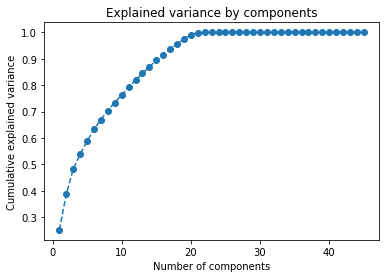

In [48]:
standar = StandardScaler()
features_s = standar.fit_transform(features)
pca = PCA()
pca.fit(features_s)
plt.plot(range(1,46), pca.explained_variance_ratio_.cumsum(), marker= 'o' , linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [49]:
pca=PCA(n_components=20)
features_pca = pd.DataFrame(pca.fit_transform(features_s))

In [61]:
X_train,X_test,y_train,y_test = train_test_split(features, label, test_size = 0.2 )
standar = StandardScaler()
pca = PCA(n_components=20)

X_train_s = standar.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_s)

X_test_s = standar.fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_s)


In [62]:
#Hyperparameter tunning to find the best hyperparameters combination
parameters={'penalty':['l1','l2'],'C':[0.1,0.3,0.5,0.7,0.9,1.5,10]}
lr=LogisticRegression(solver='liblinear')
grid=GridSearchCV(lr,param_grid=parameters).fit(X_train_pca,y_train)
grid.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [64]:
lr=LogisticRegression(penalty='l2',C=0.5,solver='liblinear').fit(X_train_pca,y_train)
y_pred=lr.predict(X_test_pca)
print('TRAIN SCORES:',lr.score(X_train_pca,y_train), 'TEST SCORE:', lr.score(X_test_pca,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.7992898913951546 TEST SCORE: 0.7629382303839732
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       879
           1       0.57      0.46      0.51       319

    accuracy                           0.76      1198
   macro avg       0.69      0.67      0.68      1198
weighted avg       0.75      0.76      0.75      1198

col_0    0    1
Churn          
0      766  113
1      171  148


In [66]:
bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train_pca, y_train)
pred_y = bbc.predict(X_test_pca)
print('TRAIN SCORES:',bbc.score(X_train_pca,y_train), 'TEST SCORE:', bbc.score(X_test_pca,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.8874269005847953 TEST SCORE: 0.7562604340567612
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       879
           1       0.57      0.46      0.51       319

    accuracy                           0.76      1198
   macro avg       0.69      0.67      0.68      1198
weighted avg       0.75      0.76      0.75      1198

col_0    0    1
Churn          
0      766  113
1      171  148


 https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

### SMOTECK TOMEK + PCA

In [9]:
#Balancing the classes by combining over- and under-sampling.
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train_norm, y_train)
y_train_res.value_counts()


0    3327
1    3327
Name: Churn, dtype: int64

Text(0, 0.5, 'Cumulative explained variance')

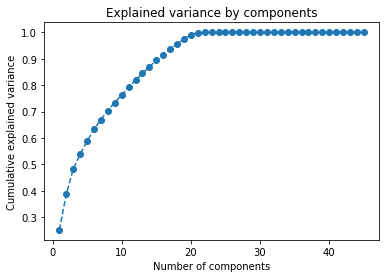

In [18]:
standar = StandardScaler()
features_s = standar.fit_transform(features)
pca = PCA()
pca.fit(features_s)
plt.plot(range(1,46), pca.explained_variance_ratio_.cumsum(), marker= 'o' , linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [19]:
pca=PCA(n_components=20)
features_pca = pd.DataFrame(pca.fit_transform(features_s))

In [20]:
X_train,X_test,y_train,y_test = train_test_split(features, label, test_size = 0.2 )
standar = StandardScaler()
pca = PCA(n_components=20)

X_train_s = standar.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_s)

X_test_s = standar.fit_transform(X_test)
X_test_pca = pca.fit_transform(X_test_s)

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train_pca, y_train)
y_train_res.value_counts()


0    3313
1    3313
Name: Churn, dtype: int64

In [27]:
bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=1000,learning_rate=1,max_depth=3),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train_res, y_train_res)
pred_y = bbc.predict(X_test_pca)
print('TRAIN SCORES:',bbc.score(X_train_res,y_train_res), 'TEST SCORE:', bbc.score(X_test_pca,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.9900392393600966 TEST SCORE: 0.6953255425709516
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       885
           1       0.47      0.79      0.59       313

    accuracy                           0.71      1198
   macro avg       0.69      0.74      0.69      1198
weighted avg       0.79      0.71      0.73      1198

col_0    0    1
Churn          
0      610  275
1       67  246


In [28]:
parameters={'max_depth':[3,5,7,9,11,13,15],
            'n_estimators': [50,100,200,300]}
rf=RandomForestClassifier()
grid=GridSearchCV(rf,param_grid=parameters).fit(X_train_res,y_train_res)
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 15, 'n_estimators': 300}
0.8623638692051567


In [70]:
rf=RandomForestClassifier(n_estimators=300, max_depth=15).fit(X_train_res,y_train_res)
y_pred=rf.predict(X_test_norm)
print('TRAIN SCORES:',rf.score(X_train_res,y_train_res), 'TEST SCORE:', rf.score(X_test_norm,y_test))
print(classification_report(y_test,y_pred))
print(pd.crosstab(y_test,y_pred))

TRAIN SCORES: 0.9809840024147298 TEST SCORE: 0.7078464106844741
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       885
           1       0.27      0.07      0.11       313

    accuracy                           0.71      1198
   macro avg       0.50      0.50      0.47      1198
weighted avg       0.62      0.71      0.64      1198

col_0    0   1
Churn         
0      827  58
1      292  21


In [66]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lr,features,label, scoring='recall', cv=cv, n_jobs=-1)
# summarize performance
print(np.mean(scores))

0.8000358251731549


In [43]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lr,features_pca,label, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))


Mean ROC AUC: 0.838
0.28115015974440893
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       885
           1       0.24      0.28      0.26       313

    accuracy                           0.57      1198
   macro avg       0.48      0.48      0.48      1198
weighted avg       0.60      0.57      0.58      1198

col_0    0    1
Churn          
0      599  286
1      225   88


## CLUSTERING OF CLASS 1

In [42]:
users = pd.read_csv('telecom_users.csv')
users.head(2)
users.drop(['Unnamed: 0','customerID'], 1, inplace = True)
# Converting total charges columns into a numerical column
users.TotalCharges.replace(' ', 0, inplace=True)
users.TotalCharges = pd.to_numeric(users.TotalCharges)


- ### CLUSTERING OF THE CATEGORICAL VARIABLES WITH KMODES

In [43]:
columns_encoded = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

le_df = pd.DataFrame()
for i in users[columns_encoded]:
    le_df[i] = LabelEncoder().fit_transform(users[i])

le_df['Churn'] = LabelEncoder().fit_transform(users['Churn'])
class_1 = le_df[le_df['Churn']==1].copy()
class_1.drop('Churn',1,inplace=True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8237.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 176, cost: 7457.0
Run 1, iteration: 2/100, moves: 10, cost: 7457.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 379, cost: 6432.0
Run 1, iteration: 2/100, moves: 144, cost: 6414.0
Run 1, iteration: 3/100, moves: 117, cost: 6333.0
Run 1, iteration: 4/100, moves: 61, cost: 6333.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 747, cost: 6413.0
Run 1, iteration: 2/100, moves: 216, cost: 6261.0
Run 1, iteration: 3/100, moves: 137, cost: 6261.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 440, cost: 5979.0
Run 1, iteration: 2/100, moves: 227, cost: 5979.0
Init

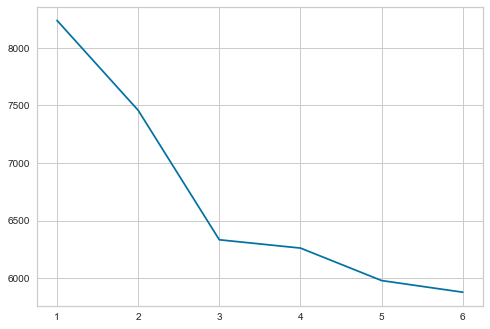

In [9]:
cost = []
for num_clusters in list(range(1,7)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(class_1)
    cost.append(kmode.cost_)
    
y = np.array([i for i in range(1,7)])
plt.plot(y,cost)

In [44]:
km = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters = km.fit_predict(class_1)

clusterCentroidsDf = pd.DataFrame(km.cluster_centroids_)
clusterCentroidsDf.columns= class_1.columns
clusterCentroidsDf

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 420, cost: 6474.0


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,0,0,1,2,1,0,0,0,0,2,2,0,1,2
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
2,1,0,1,1,1,2,1,0,0,2,0,2,2,0,1,2


In [45]:
class_1['cluster_predicted'] = fitClusters


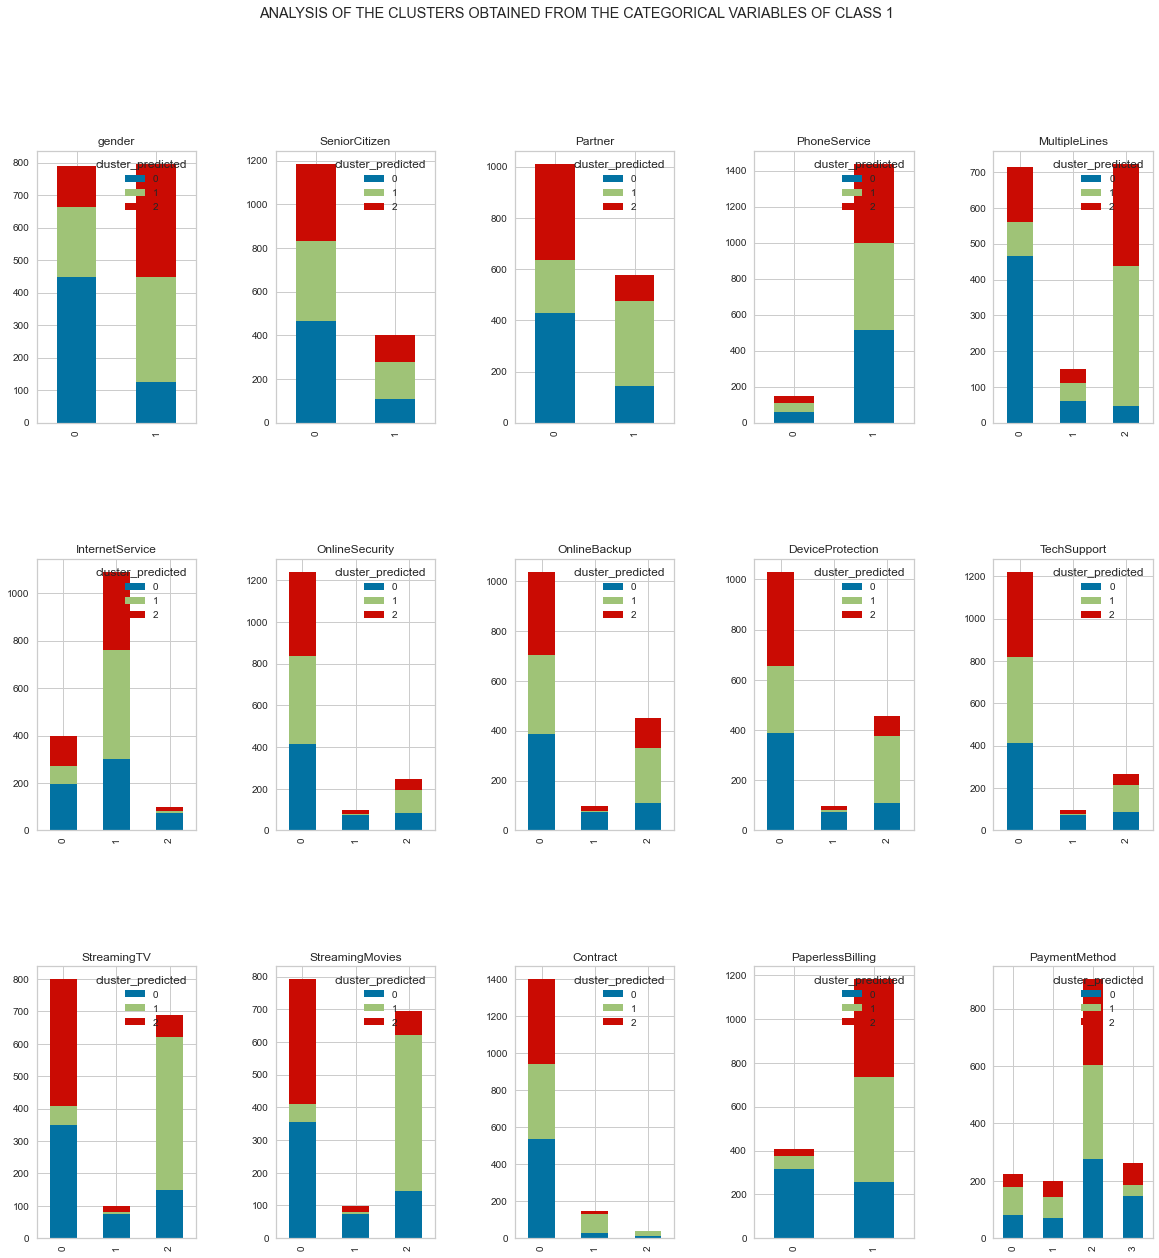

In [25]:
def stacked_bar_plot(column, hue, ax, axnumber):
    df_plot = class_1.groupby([hue, column]).size().reset_index().pivot(columns=hue, index=column, values=0)
    df_plot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)

fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3,5, figsize = (20,20))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
fig.suptitle('ANALYSIS OF THE CLUSTERS OBTAINED FROM THE CATEGORICAL VARIABLES OF CLASS 1')

stacked_bar_plot('gender', 'cluster_predicted', ax1, 1)
stacked_bar_plot('SeniorCitizen', 'cluster_predicted', ax2, 2)
stacked_bar_plot('Partner', 'cluster_predicted', ax3, 3)
stacked_bar_plot('PhoneService', 'cluster_predicted', ax4, 4)
stacked_bar_plot('MultipleLines', 'cluster_predicted', ax5, 5)
stacked_bar_plot('InternetService', 'cluster_predicted', ax6, 6)
stacked_bar_plot('OnlineSecurity', 'cluster_predicted', ax7, 7)
stacked_bar_plot('OnlineBackup', 'cluster_predicted', ax8, 8)
stacked_bar_plot('DeviceProtection', 'cluster_predicted', ax9, 9)
stacked_bar_plot('TechSupport', 'cluster_predicted', ax10, 10)
stacked_bar_plot('StreamingTV', 'cluster_predicted', ax11, 11)
stacked_bar_plot('StreamingMovies', 'cluster_predicted', ax12, 12)
stacked_bar_plot('Contract', 'cluster_predicted', ax13, 13)
stacked_bar_plot('PaperlessBilling', 'cluster_predicted', ax14, 14)
stacked_bar_plot('PaymentMethod', 'cluster_predicted', ax15, 15)

- ### CLUSTERING OF THE NUMERICAL VARIABLES WITH KMEANS

In [48]:
num_feat_orig = users[['tenure', 'MonthlyCharges', 'TotalCharges','Churn']].copy()
num_feat_orig = num_feat_orig[num_feat_orig['Churn']=='Yes']
num_feat_orig.drop('Churn',1, inplace=True)

num_feat_standard = pd.DataFrame(StandardScaler().fit_transform(num_feat_orig), columns = ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [14]:
def visualization_clusters(data, clustering_model):

    # calinski_harabasz and silhouette scores visualization
    visualizer1 = KElbowVisualizer(
        clustering_model, k=(3,17), metric='calinski_harabasz', timings=False
    )

    visualizer1.fit(data)        # Fit the data to the visualizer
    visualizer1.show()        # Finalize and render the figure

    visualizer2 = KElbowVisualizer(
        clustering_model, k=(3,17), metric='silhouette', timings=False
    )

    visualizer2.fit(data)        # Fit the data to the visualizer
    visualizer2.show()        # Finalize and render the figure
    
    visualizer3 = KElbowVisualizer(
    clustering_model, k=(3,17), metric='distortion', timings=False
    )

    visualizer3.fit(data)        # Fit the data to the visualizer
    visualizer3.show()        # Finalize and render the figure

In [15]:
def results_evaluation(model, data):

    #This function has 2 arguments:
    #-model: to define de Clusters and the scores
    #-data: the data I´m working with, to calculate the scores

    print('CLUSTERING DIVISION:\n', pd.DataFrame(model.labels_)[0].value_counts())

    
    print('The Silhouette Score is: ', silhouette_score(data, model.labels_, metric='euclidean'))
    print('The Calinski Harabasz Score is: ', calinski_harabasz_score(data, model.labels_))
    print('The Davies Douldin Score is: ', davies_bouldin_score(data, model.labels_))

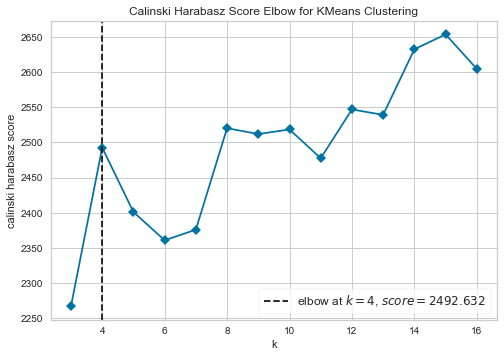

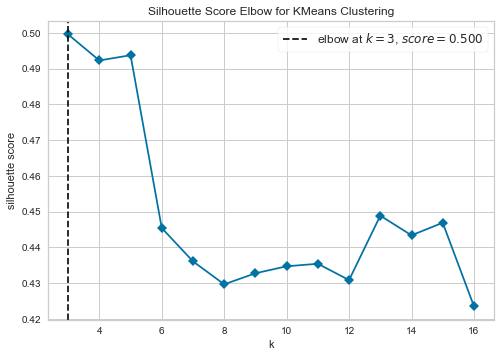

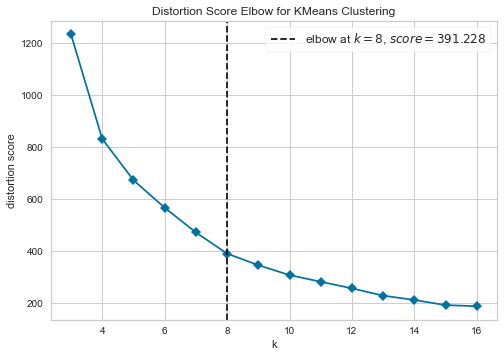

In [17]:
model = KMeans(init='k-means++', max_iter=300, n_init=3, algorithm='full')
visualization_clusters(num_feat_standard, model)

CLUSTERING DIVISION:
 1    677
3    393
2    317
0    200
Name: 0, dtype: int64
The Silhouette Score is:  0.4922719248014938
The Calinski Harabasz Score is:  2492.631932407875
The Davies Douldin Score is:  0.7148906278998574


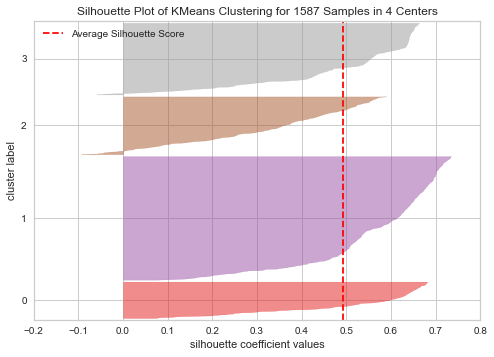

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1587 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
kmeans= KMeans(n_clusters =4, init='k-means++', max_iter=300, n_init=3, algorithm='full')
kmeans.fit(num_feat_standard)
results_evaluation(kmeans, num_feat_standard)
    
#SilhouetteVisualizer returns a plot with the Silhouette scores visualization, where we can see the estructure of the clusters.
sv = SilhouetteVisualizer(kmeans)
sv.fit(num_feat_standard)
sv.show()

In [39]:
clusterCentroidsDf = pd.DataFrame(kmeans.cluster_centers_)
clusterCentroidsDf.columns = num_feat_orig.columns
clusterCentroidsDf

,tenure,MonthlyCharges,TotalCharges
0,-0.604318,0.337925,-0.531364
1,0.733551,0.426319,0.594291
2,1.956843,1.054133,2.178824
3,-0.546517,-1.462456,-0.672829


In [54]:
clusters = kmeans.fit_predict(num_feat_standard)
num_feat_orig['cluster_predicted'] = clusters

display(num_feat_orig['cluster_predicted'].value_counts())
num_feat_orig.groupby('cluster_predicted').mean()



3    677
2    393
0    312
1    205
Name: cluster_predicted, dtype: int64

,tenure,MonthlyCharges,TotalCharges
cluster_predicted,,,
0,32.362179,84.855769,2662.559615
1,56.600000,100.012927,5658.916341
2,7.501272,37.666158,268.889059
3,6.364845,82.598523,538.396160


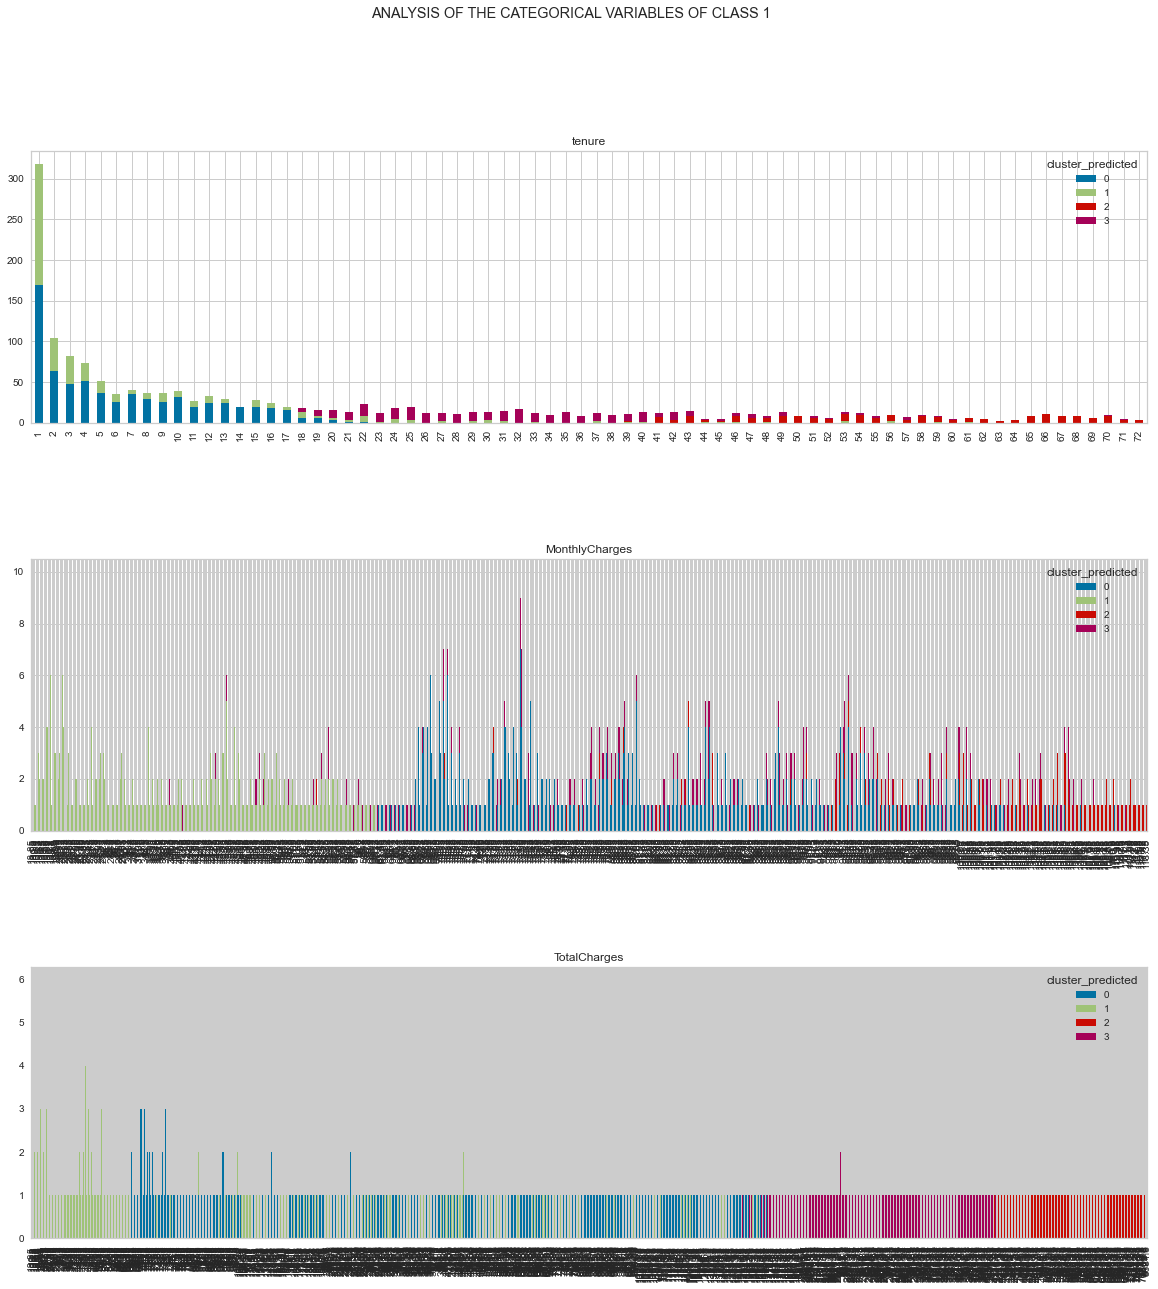

In [21]:
def stacked_bar_plot(column, hue, ax, axnumber):
    df_plot = num_feat_orig.groupby([hue, column]).size().reset_index().pivot(columns=hue, index=column, values=0)
    df_plot.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (20,20))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
fig.suptitle('ANALYSIS OF THE CLUSTERS OBTANIED FROM THE NUMERICAL VARIABLES OF CLASS 1')

stacked_bar_plot('tenure', 'cluster_predicted', ax1, 1)
stacked_bar_plot('MonthlyCharges', 'cluster_predicted', ax2, 2)
stacked_bar_plot('TotalCharges', 'cluster_predicted', ax3, 3)
